In [44]:
'''''data cleaning
1. Drop the unwanted columns
2. Check the corelation and make sure below
    2.1 Plot the HeatMap to check the heat map.
    2.1 Drop the corelated columns in (x asxis) it mean we are droping the columns which has double information. (df.corr)
    2.2 Out of duplicated columns, Drop only that column which is less corelated with the 'Y axis'
3. Make all the values on same scaler using scaler fuction, after this we get the arra which we need to convert into the dataframe back.
4. convert the arry into dataframe
5. Using the lr.fit() function we train the model
6. using the lr.preditc we predict (label) for the y_train
7. we will compare the y_predict and y_test

'''''

"''data cleaning\n1. Drop the unwanted columns\n2. Check the corelation and make sure below\n    2.1 Plot the HeatMap to check the heat map.\n    2.1 Drop the corelated columns in (x asxis) it mean we are droping the columns which has double information. (df.corr)\n    2.2 Out of duplicated columns, Drop only that column which is less corelated with the 'Y axis'\n3. Make all the values on same scaler using scaler fuction, after this we get the arra which we need to convert into the dataframe back.\n4. convert the arry into dataframe\n5. Using the lr.fit() function we train the model\n6. using the lr.preditc we predict (label) for the y_train\n7. we will compare the y_predict and y_test\n\n"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.drop('Address', axis=1, inplace=True)

In [9]:
x = df.isnull()

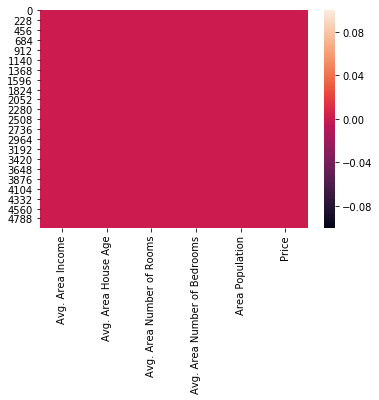

In [10]:
sns.heatmap(x)

In [11]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


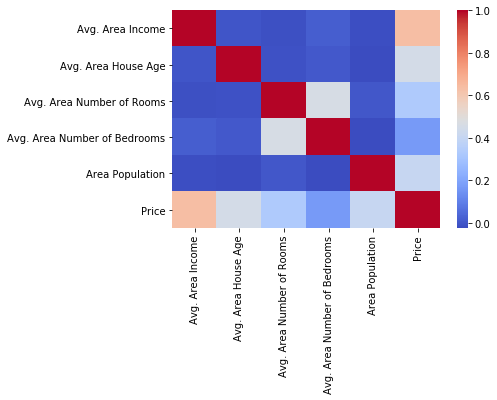

In [12]:
sns.heatmap(df.corr(),  cmap='coolwarm')

In [13]:
df.drop('Avg. Area Number of Bedrooms', axis=1, inplace=True)   ### We droped the "Avg. Area Number of Bedrooms" becasue it less corelate with the proce.

In [14]:
df.mean()

Avg. Area Income             6.858311e+04
Avg. Area House Age          5.977222e+00
Avg. Area Number of Rooms    6.987792e+00
Area Population              3.616352e+04
Price                        1.232073e+06
dtype: float64

In [15]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()

In [18]:
scale_array = ss.fit_transform(df.drop('Price', axis = 1))

In [19]:
scale_array.shape

(5000, 4)

In [20]:
x = pd.DataFrame(data = scale_array, columns = df.columns[:-1], index= df.index)
y = df['Price']

In [21]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [22]:
x.mean()

Avg. Area Income            -2.259304e-17
Avg. Area House Age         -8.176446e-18
Avg. Area Number of Rooms   -4.058254e-16
Area Population             -3.464784e-16
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [25]:
x_train.shape

(3500, 4)

In [26]:
x_test.shape

(1500, 4)

In [27]:
y_train.shape

(3500,)

In [28]:
y_test.shape

(1500,)

In [45]:
from sklearn.linear_model import LinearRegression    #Imported the LineraRegression from the sklearn libary

In [30]:
lr = LinearRegression()   # we create the object for the class "LinearRegression"

In [37]:
lr.fit(x_train,y_train)    # we train the model by providing the y_train and x_train data.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lr.coef_      # this s the fntion to see the coefficient of all the features.

array([230170.68318193, 164033.83479841, 122330.81079005, 150275.34789129])

In [39]:
lr.intercept_     #This function is used to see the intercept or constant of the linear euation

1231593.1762730256

In [47]:
y_predict =lr.predict(x_test)     # we are predicting the labels for the provided x_train features.

In [48]:
len(y_predict )     

1500

In [42]:
len(y_test)

1500

In [49]:
y_test - y_predict

4173     45109.548100
2710   -176821.566480
2242    -72454.317619
4003   -103788.922642
4456    -26997.817686
1904    -85136.535313
3958   -114885.392666
530      62266.416393
1357     41412.664325
2275    -40686.610680
764      35843.055313
3745    -85442.128852
136      19007.067575
2900     54229.264915
854    -105211.814545
3246    133896.603559
828      86859.695278
2039    244349.619843
4743     39880.023335
4775   -127880.509079
292      33247.194946
4854     23735.841552
3705     43117.105366
301     -16299.831841
2837    246436.828009
4520    -25223.155256
2073    139279.211296
4621    -62095.200981
3481    143006.000681
294     -45338.537747
            ...      
1182   -124941.920863
1284    182554.853983
4625    236285.300430
601       -550.920967
4701    110485.159009
3394   -125204.959881
1212   -131549.316674
3960     50716.075960
433      27363.510309
4643   -116906.213375
1434   -122344.023991
359      -3256.303679
2489   -131132.835071
4163    109751.530301
2674     4

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


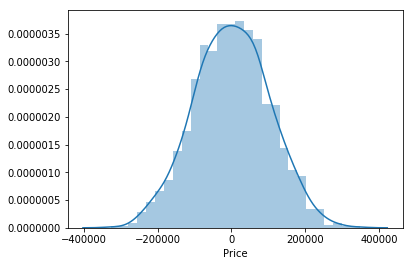

In [50]:
sns.distplot(y_test - y_predict)

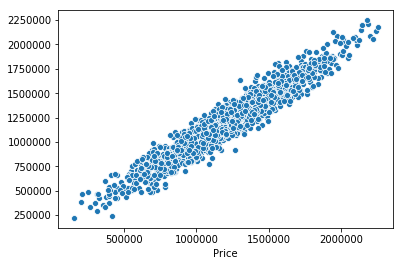

In [51]:
sns.scatterplot(x= y_test, y = y_predict) ###

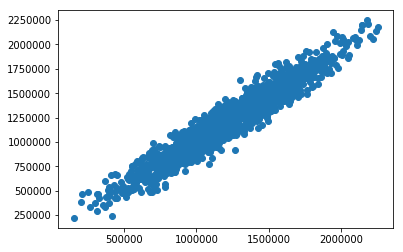

In [52]:
plt.scatter(y_test, y_predict)